In [2]:
from ultralytics import YOLO

# 1. Обучение модели

Беру обученную на датасете COCO модель 

In [ ]:
# model = YOLO('/container_root/ws/models/yolo11n-seg.pt')
# seg_res = model(path_to_image)

# 2. Профилирование модели PyTorch

In [3]:
import torch
import torchvision.models as models
from torch.profiler import profile, record_function, ProfilerActivity

In [6]:
model = YOLO('/container_root/ws/models/yolo11n-seg.pt')
img_path = '/container_root/ws/notebooks/data/bus.jpg'

## Анализ времени выполнения

In [9]:

model = YOLO('/container_root/ws/models/yolo11n-seg.pt')
with profile(activities=[ProfilerActivity.CPU], record_shapes=True) as prof:
    with record_function("model_inference"):
        model(img_path)

# print(prof.key_averages(group_by_input_shape=True).table(sort_by="self_cpu_time_total", row_limit=100))
print(prof.key_averages().table(sort_by="self_cpu_time_total", row_limit=100))


image 1/1 /container_root/ws/notebooks/data/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 173.7ms
Speed: 3.0ms preprocess, 173.7ms inference, 13.1ms postprocess per image at shape (1, 3, 640, 480)
-------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                       Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                            model_inference        25.35%     110.630ms       100.00%     436.444ms     436.444ms             1  
                   aten::mkldnn_convolution        24.44%     106.652ms        24.75%     108.024ms       1.228ms            88  
                                   aten::mm        20.73%      90.458ms        20.75%      90.572ms     500.400us           181  
                    

## Анализ потребления памяти

In [23]:
with profile(activities=[ProfilerActivity.CPU], profile_memory=True, record_shapes=True) as prof:
    with record_function("model_inference"):
        model(img_path)

print(prof.key_averages().table(sort_by="self_cpu_memory_usage", row_limit=100))


image 1/1 /container_root/ws/notebooks/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 177.1ms
Speed: 4.3ms preprocess, 177.1ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 480)
---------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                             Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
---------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                      aten::empty         0.76%       1.573ms         0.76%       1.573ms       6.666us      78.86 Mb      78.86 Mb           236  
                        aten::cat         3.82%       7.864ms         4.12%       8.500ms     326.904us      32.38 Mb      32.38 Mb            26  
        aten::upsample_bilinear2d         1.40%       2.878ms     

# Convert to ONNX

In [42]:
model.export(format="onnx")

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.6.0+cpu CPU (AMD Ryzen 7 3700U with Radeon Vega Mobile Gfx)

PyTorch: starting from '/container_root/ws/models/yolo11n-seg.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 116, 8400), (1, 32, 160, 160)) (5.9 MB)

ONNX: starting export with onnx 1.16.1 opset 19...
ONNX: slimming with onnxslim 0.1.49...
ONNX: export success ✅ 3.7s, saved as '/container_root/ws/models/yolo11n-seg.onnx' (11.2 MB)

Export complete (4.3s)
Results saved to /container_root/ws/models
Predict:         yolo predict task=segment model=/container_root/ws/models/yolo11n-seg.onnx imgsz=640  
Validate:        yolo val task=segment model=/container_root/ws/models/yolo11n-seg.onnx imgsz=640 data=/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app


'/container_root/ws/models/yolo11n-seg.onnx'

# VIsualize using Tensorboard

In [ ]:
# # imports
# import matplotlib.pyplot as plt
# import numpy as np

# import torch
# import torchvision
# import torchvision.transforms as transforms

# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim

# # transforms
# transform = transforms.Compose(
#     [transforms.ToTensor(),
#     transforms.Normalize((0.5,), (0.5,))])

# # datasets
# trainset = torchvision.datasets.FashionMNIST('./data',
#     download=True,
#     train=True,
#     transform=transform)
# testset = torchvision.datasets.FashionMNIST('./data',
#     download=True,
#     train=False,
#     transform=transform)

# # dataloaders
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
#                                         shuffle=True, num_workers=2)


# testloader = torch.utils.data.DataLoader(testset, batch_size=4,
#                                         shuffle=False, num_workers=2)

# # constant for classes
# classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#         'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# # helper function to show an image
# # (used in the `plot_classes_preds` function below)
# def matplotlib_imshow(img, one_channel=False):
#     if one_channel:
#         img = img.mean(dim=0)
#     img = img / 2 + 0.5     # unnormalize
#     npimg = img.numpy()
#     if one_channel:
#         plt.imshow(npimg, cmap="Greys")
#     else:
#         plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [ ]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 4 * 4, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(-1, 16 * 4 * 4)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x


# net = Net()

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# from torch.utils.tensorboard import SummaryWriter

# # default `log_dir` is "runs" - we'll be more specific here
# writer = SummaryWriter('runs/fashion_mnist_experiment_1')

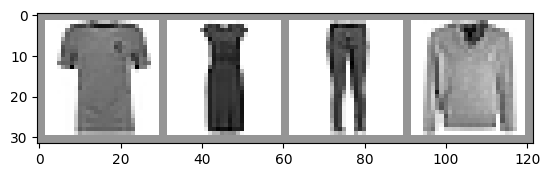

In [40]:
# # get some random training images
# dataiter = iter(trainloader)
# images, labels = next(dataiter)

# # create grid of images
# img_grid = torchvision.utils.make_grid(images)

# # show images
# matplotlib_imshow(img_grid, one_channel=True)

# # write to tensorboard
# writer.add_image('four_fashion_mnist_images', img_grid)


In [ ]:
# writer.add_graph(net, images)
# writer.close()